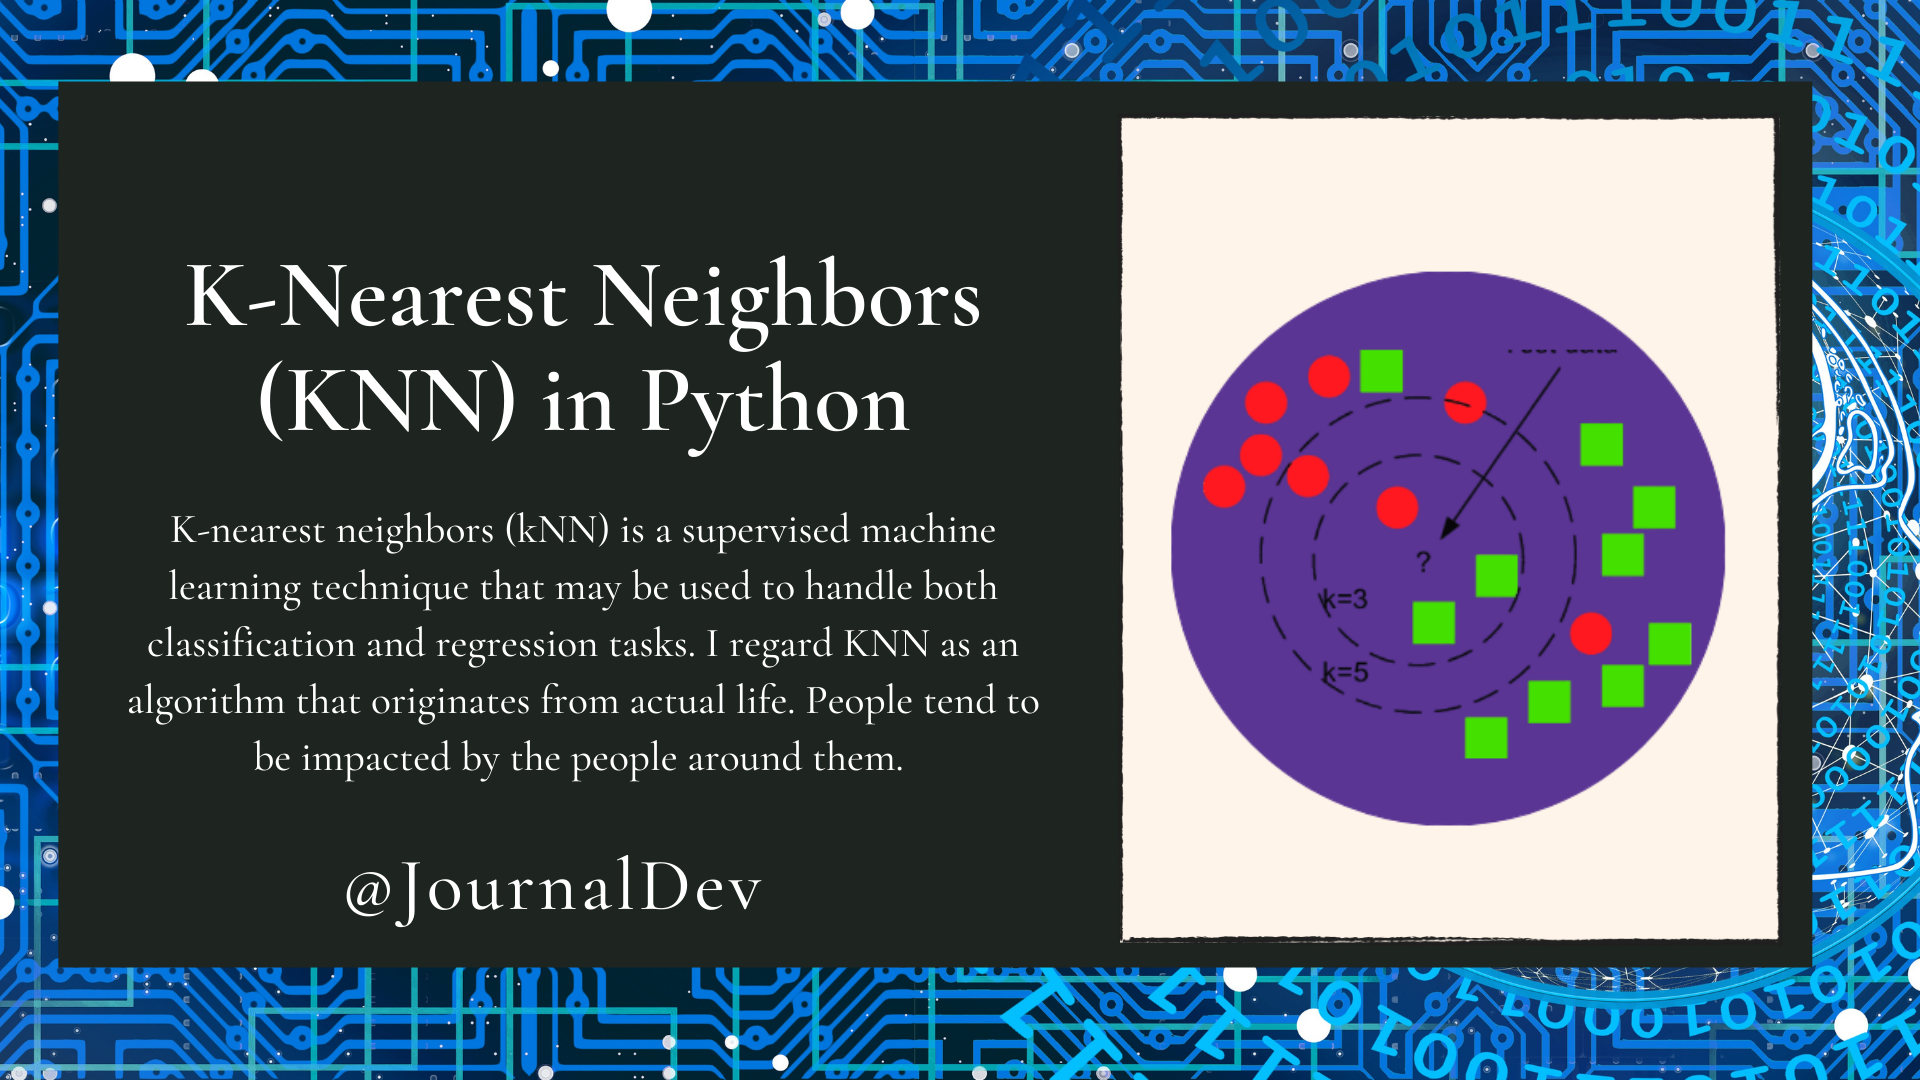

# KNN Regression (K-Nearest Neighbors Regression) 
# KNN Regression is a simple way to predict values based on nearby data points.

### How It Works:
### Find Neighbors – When you want to predict a value for a new data point, KNN looks at the "K" closest points (neighbors) in the dataset.

### Average Their Values – It takes the average (or weighted average) of these neighbors' values.

### Predict the Result – This average becomes the predicted value for the new data point.

#### Example:
#### Imagine you have a dataset of houses with their sizes and prices. If you want to predict the price of a new house based on its size, KNN Regression will:

# Find the "K" houses closest in size.

# Calculate the average price of those houses.

# Use this average as the predicted price for the new house.

## Key Points:
### Works well for small datasets.

### Choosing the right K value is important (too small = noisy, too large = less accurate).

### Unlike KNN classification, where we pick the most common category, here we calculate an average.

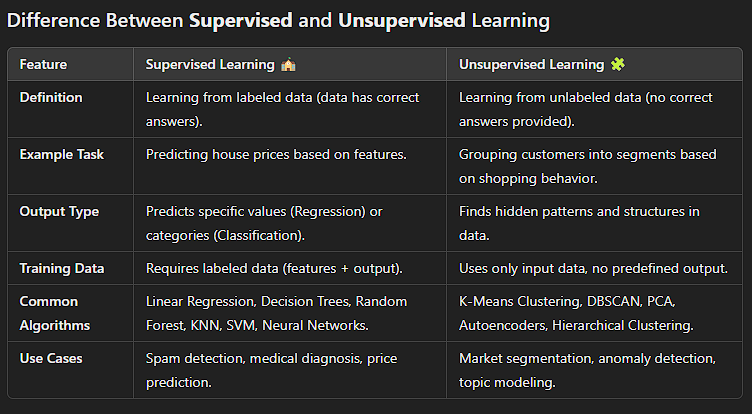

# Example to Understand Easily
### Supervised Learning: Imagine a teacher showing students labeled flashcards of animals (dog, cat, elephant) and asking them to recognize them.

### Unsupervised Learning: Imagine students getting a bunch of pictures with no labels and trying to group similar-looking animals together.

Classification 
Classification is a type of Supervised Learning where a model learns to categorize data into predefined classes (or groups).

How It Works:
Train the Model – The model is trained on labeled data (where we already know the correct category).

Learn Patterns – The model identifies patterns in the input data.

Predict New Data – When given new input, the model assigns it to one of the predefined classes.

Examples:
Spam Detection – Classify emails as Spam or Not Spam.

Disease Diagnosis – Classify patients as Diabetic or Non-Diabetic based on health data.

Handwriting Recognition – Recognize handwritten digits (0-9).

Sentiment Analysis – Classify customer reviews as Positive, Negative, or Neutral.

Types of Classification:
Binary Classification – Only two categories (e.g., Yes/No, Spam/Not Spam).

Multi-Class Classification – More than two categories (e.g., classifying animals as Dog, Cat, or Rabbit).

Multi-Label Classification – An item can belong to multiple categories (e.g., a news article tagged as Politics and Sports).

Common Algorithms for Classification:
Logistic Regression

Decision Trees

Random Forest

Support Vector Machines (SVM)

K-Nearest Neighbors (KNN)

Neural Networks

In [4]:
import numpy as np
import pandas as pd
import sklearn

In [5]:
df = pd.read_csv(r"D:\python lerning\ML\1) Regression\4) Decision Tree Regression\Practical Codes\50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:
df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [8]:
X= df.drop(columns='Profit')
y= df['Profit']

In [9]:
X = pd.get_dummies(data=X,columns=['State'],drop_first=True)

In [10]:
X.head()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349.20,136897.80,471784.10,False,True
1,162597.70,151377.59,443898.53,False,False
2,153441.51,101145.55,407934.54,True,False
3,144372.41,118671.85,383199.62,False,True
4,142107.34,91391.77,366168.42,True,False


# test train split

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [12]:
X_test

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
28,66051.52,182645.56,118148.20,True,False
11,100671.96,91790.61,249744.55,False,False
10,101913.08,110594.11,229160.95,True,False
41,27892.92,84710.77,164470.71,True,False
2,153441.51,101145.55,407934.54,True,False
27,72107.60,127864.55,353183.81,False,True
38,20229.59,65947.93,185265.10,False,True
31,61136.38,152701.92,88218.23,False,True
22,73994.56,122782.75,303319.26,True,False
4,142107.34,91391.77,366168.42,True,False


In [13]:
y_test

28    103282.38
11    144259.40
10    146121.95
41     77798.83
2     191050.39
27    105008.31
38     81229.06
31     97483.56
22    110352.25
4     166187.94
Name: Profit, dtype: float64

# KNN regression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=1)

# prediction

In [15]:
y_pred = knn.predict(X_test)
y_pred

array([101004.64, 129917.04, 141585.52,  81005.76, 182901.99, 108733.99,
        81005.76, 101004.64, 118474.03, 156991.12])

In [16]:
train_acc = knn.predict(X_train)

In [17]:
knn.predict([[165349.20,136897.80,471784.10,0,1]])

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([192261.83])

# evaulton

In [18]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9620745980769433